# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.  There are lots of features, and a description of the features can be found in the file stroke_data_feature_descriptions.csv.

Train a decision tree model to try to predict whether or not a stroke patient receives clot-busting treatment.  Use the prompts below to write each section of code.

## Core Tasks

Run the code below to import the dataset and the libraries we need. 

In [1]:
import pandas as pd
import numpy as np

# import preprocessing functions
from sklearn.model_selection import train_test_split

# Import machine learning model of interest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Import package to investigate our loaded dataframe
from ydata_profiling import ProfileReport

# Import functions for evaluating model
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, \
                            confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve
from sklearn.inspection import permutation_importance

# Imports relating to logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Imports relating to plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Download data
# (not required if running locally and have previously downloaded data)

download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)

# Load data
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)

Look at an overview of the data. Choose whichever method you like.

(e.g. something like the 'head' or 'describe' method from pandas.)

In [2]:
data.describe()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,...,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000
mean,0.403330,0.159506,0.142320,0.154672,0.165414,0.055854,0.113319,0.208915,0.515575,74.553706,...,1.114930,1.002148,0.963480,0.963480,0.910849,0.216971,0.610097,0.944146,0.739527,0.566595
std,0.490698,0.366246,0.349472,0.361689,0.371653,0.229701,0.317068,0.406643,0.499892,12.280576,...,0.930527,1.479211,1.441594,1.406501,1.380606,0.522643,0.771932,1.121379,0.731083,0.794000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,83.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000


Load in the 'stroke_data_feature_descriptions' dataframe and view that too - you can just view the whole dataframe with pandas rather than using the ProfileReport. 

Hint: it's in the same folder as the hsma_stroke.csv dataset we imported above.

In [3]:
stroke_data_feature_descriptions_df = pd.read_csv('../datasets/stroke_data_feature_descriptions.csv')

stroke_data_feature_descriptions_df

,Feature,Description
0,# Comorbidities,Number of comorbidities
1,2+ comorbidotes,If the patient had at least two comorbidities
2,80+,If the patient is aged 80 or over
3,Age,Age of patient
4,Anticoag before stroke_0,Did not take anticoagulants before stroke
5,Anticoag before stroke_1,Did take anticoagulants before stroke
6,Anticoag before stroke_NK,Not known if was taking anticoagulants before ...
7,Antiplatelet_0,Did not receive antiplatelet treatment
8,Antiplatelet_1,Did receive antiplatelet treatment
9,Antiplatelet_NK,Not known if received antiplatelet treatment


Divide the main stroke dataset into features and labels.

Remember - we're trying to predict whether patients are given clotbusting treatment or not.

What column contains that information?

In [4]:
X = data.drop('Clotbuster given', axis=1)
y = data['Clotbuster given']

Split the data into training and testing sets. 

Start with a train/test split of 80/20. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit a random forest model.

In [6]:
model = RandomForestClassifier(random_state=42)
model = model.fit(X_train, y_train)

Use the trained model to predict labels in both training and test sets, and calculate and compare accuracy.

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 81.233%


Calculate the additional model metrics for the test data only.

- precision
- specificity
- recall (sensitivity)
- f1

Return the 'micro' average in each case.

In [8]:
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')

print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")
print(f"f1 score for testing data = {f1_score_test:.3%}")

Precision score for testing data = 81.233%
Recall (sensitivity) score for testing data = 81.233%
Specificity score for testing data = 84.255%
f1 score for testing data = 81.233%


Repeat this using the `classification_report` function, returning the output as a dataframe.

In [9]:
pd.DataFrame(classification_report(
    y_true = y_test,
    y_pred = y_pred_test,
    target_names=["Not Given Clotbuster", "Given Clotbuster"],
    output_dict=True
))

,Not Given Clotbuster,Given Clotbuster,accuracy,macro avg,weighted avg
precision,0.842553,0.760870,0.812332,0.801711,0.811456
recall,0.857143,0.739437,0.812332,0.798290,0.812332
f1-score,0.849785,0.750000,0.812332,0.799893,0.811797
support,231.000000,142.000000,0.812332,373.000000,373.000000


Plot a confusion matrix for your model.

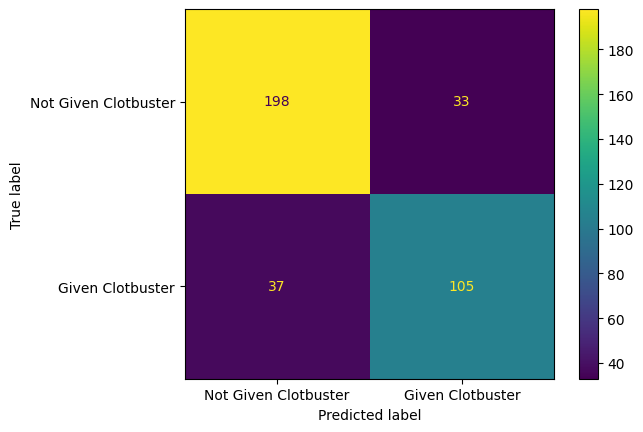

In [10]:
confusion_matrix_rf = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test,
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_rf.plot()

plt.show()

Plot a normalized confusion matrix for your model.

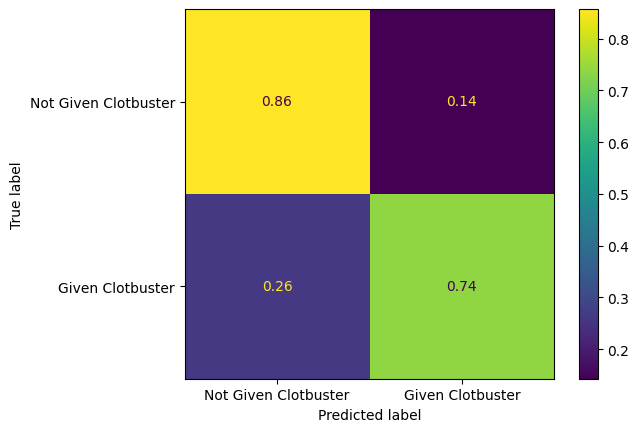

In [11]:
confusion_matrix_rf_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test,
        normalize='true'
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_rf_normalised.plot()

plt.show()

## Part 2 - Refining Your Random Forest

Let's experiment by changing a few parameters.

After changing the parameters, look at the model metrics like accuracy, precision, and recall.

Tweak the parameters to see what model performance you can achieve.

In [12]:
def fit_model(model):
    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    precision_score_test = precision_score(y_test, y_pred_test, average='micro')
    recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
    specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

    # Note that the lecture slides show this displayed as a float using :3f
    # We can instead use :.3% to format the number as a percentage to 3 decimal places.
    print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
    print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
    print(f"Precision score for testing data = {precision_score_test:.3%}")
    print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
    print(f"Specificity score for testing data = {specificity_score_test:.3%}")


### Maximum Depth

In [13]:
fit_model(model = RandomForestClassifier(max_depth=8, random_state=42))

Accuracy of predicting training data = 89.389%
Accuracy of predicting testing data = 83.646%
Precision score for testing data = 83.646%
Recall (sensitivity) score for testing data = 83.646%
Specificity score for testing data = 88.991%


In [14]:
fit_model(model = RandomForestClassifier(max_depth=4, random_state=42))

Accuracy of predicting training data = 81.733%
Accuracy of predicting testing data = 82.574%
Precision score for testing data = 82.574%
Recall (sensitivity) score for testing data = 82.574%
Specificity score for testing data = 87.727%


In [15]:
fit_model(model = RandomForestClassifier(max_depth=3, random_state=42))

Accuracy of predicting training data = 80.188%
Accuracy of predicting testing data = 80.429%
Precision score for testing data = 80.429%
Recall (sensitivity) score for testing data = 80.429%
Specificity score for testing data = 85.268%


In [16]:
fit_model(model = RandomForestClassifier(max_depth=14, random_state=42))

Accuracy of predicting training data = 98.791%
Accuracy of predicting testing data = 81.769%
Precision score for testing data = 81.769%
Recall (sensitivity) score for testing data = 81.769%
Specificity score for testing data = 84.681%


### Number of Trees

In [17]:
fit_model(model = RandomForestClassifier(n_estimators=50, random_state=42))

Accuracy of predicting training data = 99.933%
Accuracy of predicting testing data = 81.501%
Precision score for testing data = 81.501%
Recall (sensitivity) score for testing data = 81.501%
Specificity score for testing data = 84.034%


In [18]:
fit_model(model = RandomForestClassifier(n_estimators=500, random_state=42))

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 82.306%
Precision score for testing data = 82.306%
Recall (sensitivity) score for testing data = 82.306%
Specificity score for testing data = 85.106%


In [19]:
fit_model(model = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42))

Accuracy of predicting training data = 89.657%
Accuracy of predicting testing data = 82.038%
Precision score for testing data = 82.038%
Recall (sensitivity) score for testing data = 82.038%
Specificity score for testing data = 87.273%


## Part 3 - Comparing Performance with a Decision Tree Model

Copy your code in from the previous exercise on decision trees.

If you tuned your decision tree, you can bring in the best-performing of your decision tree models.

In [20]:
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree = model_decision_tree.fit(X_train, y_train)
y_pred_train_dt = model_decision_tree.predict(X_train)
y_pred_test_dt = model_decision_tree.predict(X_test)

Look at all of the metrics.

- precision
- specificity
- recall (sensitivity)
- f1

In [21]:
accuracy_train = np.mean(y_pred_train_dt == y_train)
accuracy_test = np.mean(y_pred_test_dt == y_test)

precision_score_test = precision_score(y_test, y_pred_test_dt, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test_dt, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test_dt, pos_label=0)
f1_score_test = f1_score(y_test, y_pred_test_dt, average='micro')

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")
print(f"f1 score for testing data = {f1_score_test:.3%}")

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 78.016%
Precision score for testing data = 78.016%
Recall (sensitivity) score for testing data = 78.016%
Specificity score for testing data = 82.819%
f1 score for testing data = 78.016%


Plot a confusion matrix for the decision tree model. 

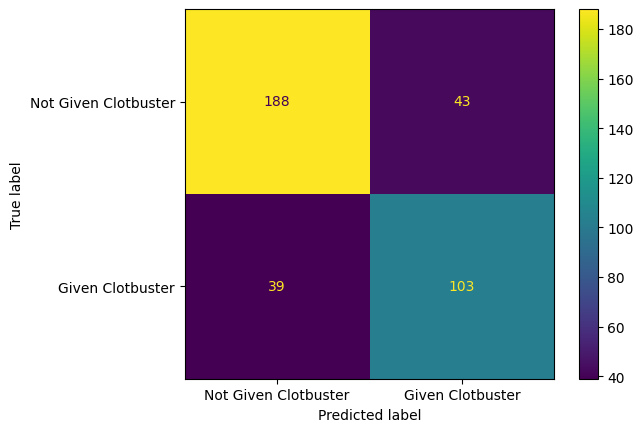

In [22]:
confusion_matrix_dt = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test_dt,
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_dt.plot()

plt.show()

Plot a normalised confusion matrix for the decision tree model. 

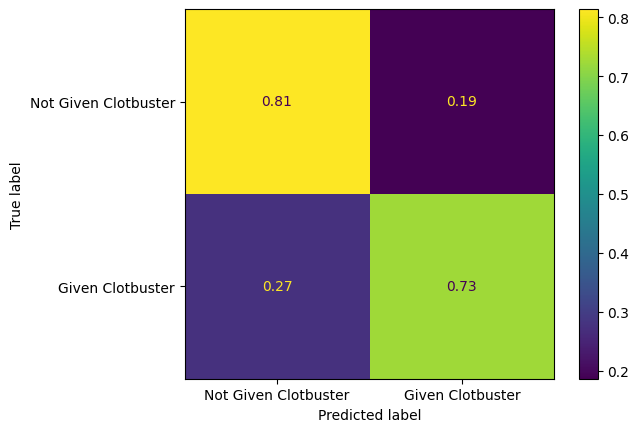

In [23]:
confusion_matrix_dt_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test_dt,
        normalize="true"
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_dt_normalised.plot()

plt.show()

## Extension

### ROC and AUC

Create receiver operating curves (ROC), labelled with the area under the curve (AUC). 

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9049448204377781

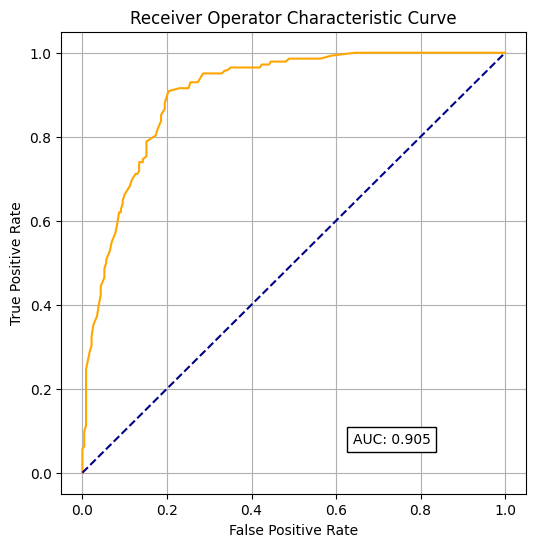

In [25]:
fig = plt.figure(figsize=(6,6))

# Plot ROC
ax = fig.add_subplot()
ax.plot(fpr, tpr, color='orange')
ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operator Characteristic Curve')
text = f'AUC: {roc_auc:.3f}'
ax.text(0.64,0.07, text,
         bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()

### Comparing Performance with a Logistic Regression Model

Copy your code in from last week's logistic regression exercise. 

**Remember - you will need to standardise the data for the logistic regression model!**

Look at all of the metrics.

- precision
- specificity
- recall (sensitivity)
- f1


In [26]:
scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)

model_lr = LogisticRegression()
model_lr = model_lr.fit(X_train_stand, y_train)

y_pred_train_lr = model_lr.predict(X_train_stand)
y_pred_test_lr = model_lr.predict(X_test_stand)

accuracy_train = np.mean(y_pred_train_lr == y_train)
accuracy_test = np.mean(y_pred_test_lr == y_test)
precision_score_test = precision_score(y_test, y_pred_test_lr, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test_lr, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test_lr, pos_label=0)
f1_score_test = f1_score(y_test, y_pred_test, average='micro')


# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")
print(f"f1 score for testing data = {f1_score_test:.3%}")

Accuracy of predicting training data = 81.934%
Accuracy of predicting testing data = 82.038%
Precision score for testing data = 82.038%
Recall (sensitivity) score for testing data = 82.038%
Specificity score for testing data = 88.318%
f1 score for testing data = 81.233%


Plot a confusion matrix for the logistic regression model. 

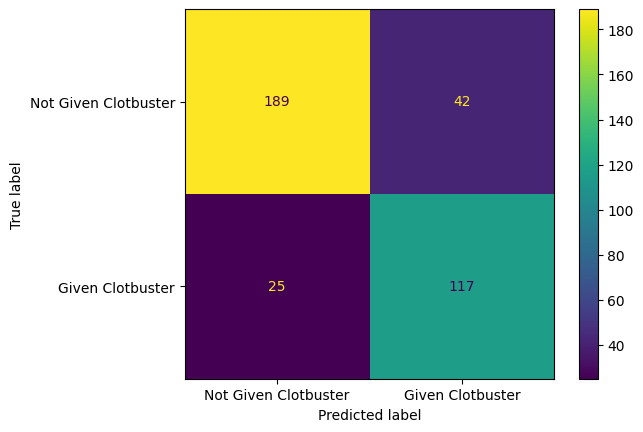

In [27]:
confusion_matrix_lr = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test_lr,
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_lr.plot()

plt.show()

Plot a normalised confusion matrix for the logistic regression model.

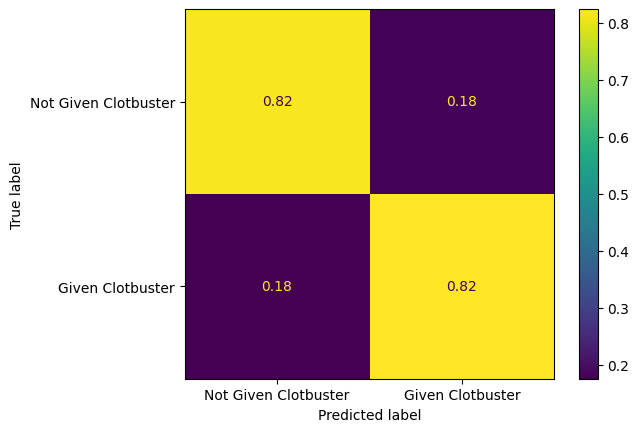

In [28]:
confusion_matrix_lr_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true = y_test,
        y_pred=y_pred_test_lr,
        normalize='true'
    ),
    display_labels=["Not Given Clotbuster", "Given Clotbuster"]
)

confusion_matrix_lr_normalised.plot()

plt.show()

### Comparing all of the models

In the previous exercise, we compared the performance of the logistic regression model and the decision tree model.

Now consider the random forest too. 

Compare and contrast the confusion matrices for each fo these.

If one of these models were to be selected, which model would you recommend to put into use, and why?

Remember: giving thrombolysis to good candidates for it can lead to less disability after stroke and improved outcomes. However, there is a risk that giving thrombolysis to the wrong person could lead to additional bleeding on the brain and worse outcomes. What might you want to balance?

You can write your answer into the empty cell below.

## Challenge

### Challenge Exercise 1

Try plotting all of your confusion matrices onto a single matplotlib figure. 

Make sure you give each of these a title.

Hint: You'll need to create multiple matplotlib subplots.

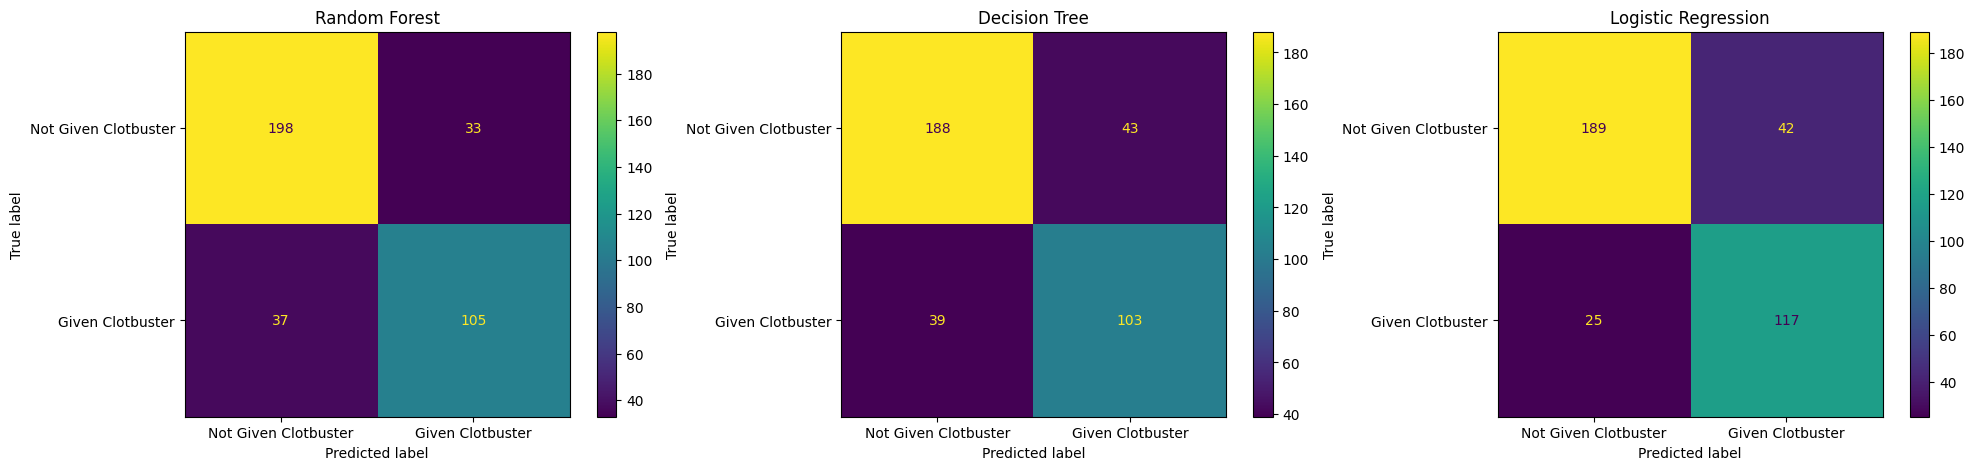

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 5))
confusion_matrix_rf.plot(ax=ax1)
ax1.title.set_text('Random Forest')

confusion_matrix_dt.plot(ax=ax2)
ax2.title.set_text('Decision Tree')

confusion_matrix_lr.plot(ax=ax3)
ax3.title.set_text('Logistic Regression')

Now do the same for the normalised confusion matrices.

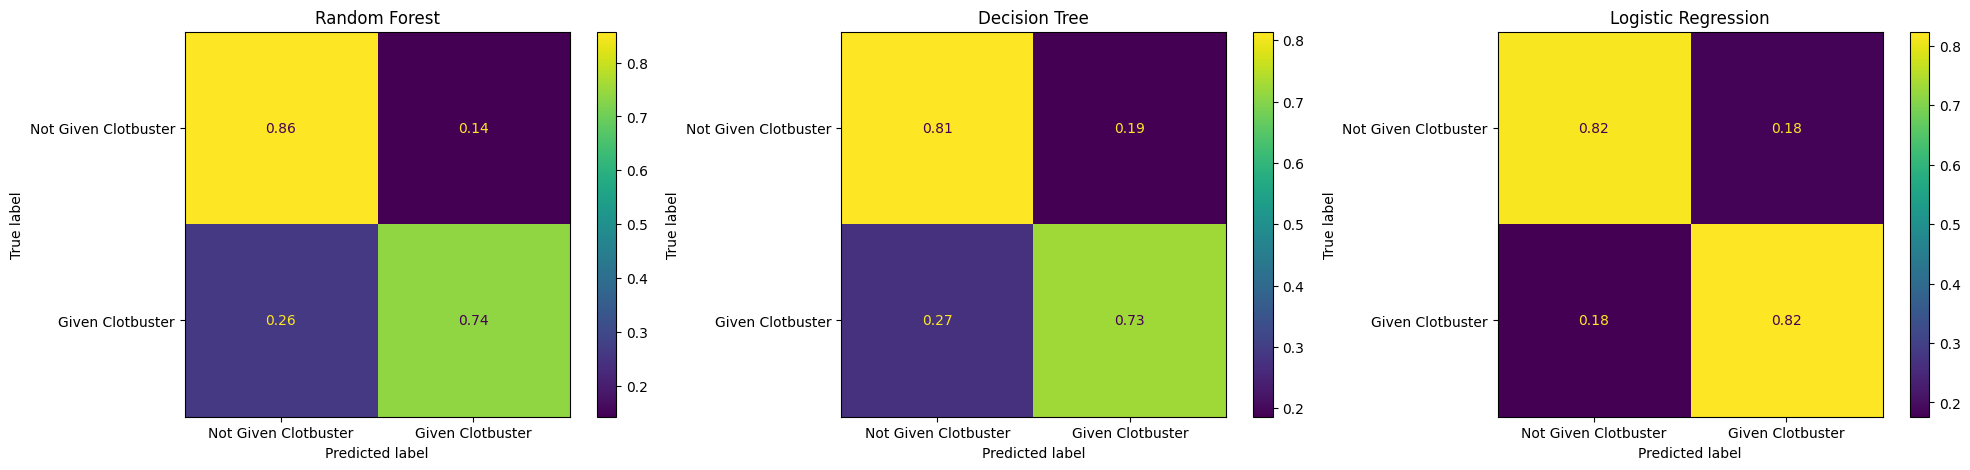

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 5))
confusion_matrix_rf_normalised.plot(ax=ax1)
ax1.title.set_text('Random Forest')

confusion_matrix_dt_normalised.plot(ax=ax2)
ax2.title.set_text('Decision Tree')

confusion_matrix_lr_normalised.plot(ax=ax3)
ax3.title.set_text('Logistic Regression')

Now do the same for your ROC curves.

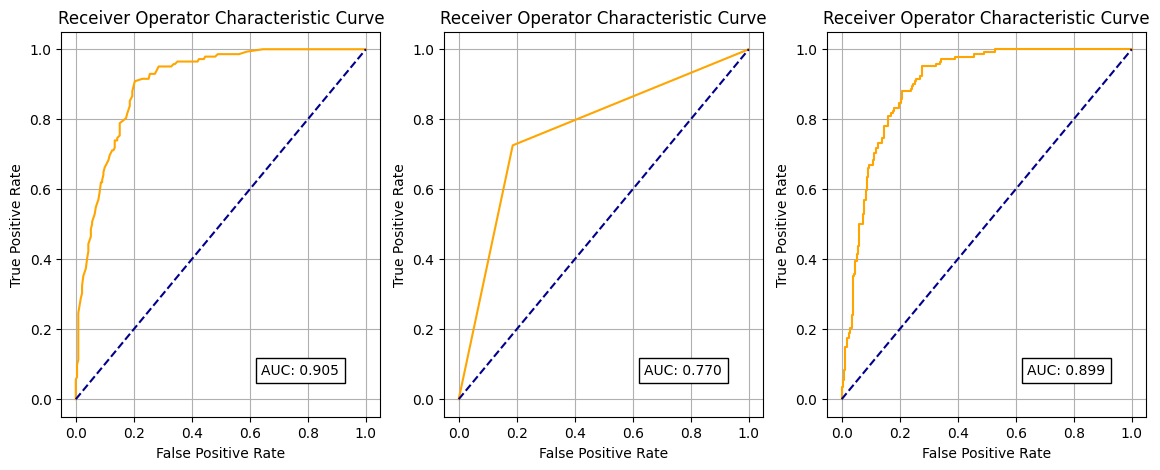

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

def plot_roc(model, ax, title, X_test):

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='orange')
    ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operator Characteristic Curve')
    text = f'AUC: {roc_auc:.3f}'
    ax.text(0.64,0.07, text,
            bbox=dict(facecolor='white', edgecolor='black'))
    ax.grid(True)

plot_roc(model, ax1, "Random Forest", X_test)
plot_roc(model_decision_tree, ax2, "Decision Tree", X_test)
plot_roc(model_lr, ax3, "Logistic Regression", X_test_stand)


### Challenge Exercise 2

Using a random forest gives us another way to look at feature importance in our datasets.

Take a look at this example from the scikit learn documentation. 
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Calculate the feature importance using both methods (mean decrease in impurity, and feature permutation) for the dataset we have been working with in this exercise. 

Do they produce the same ranking of feature importance? 

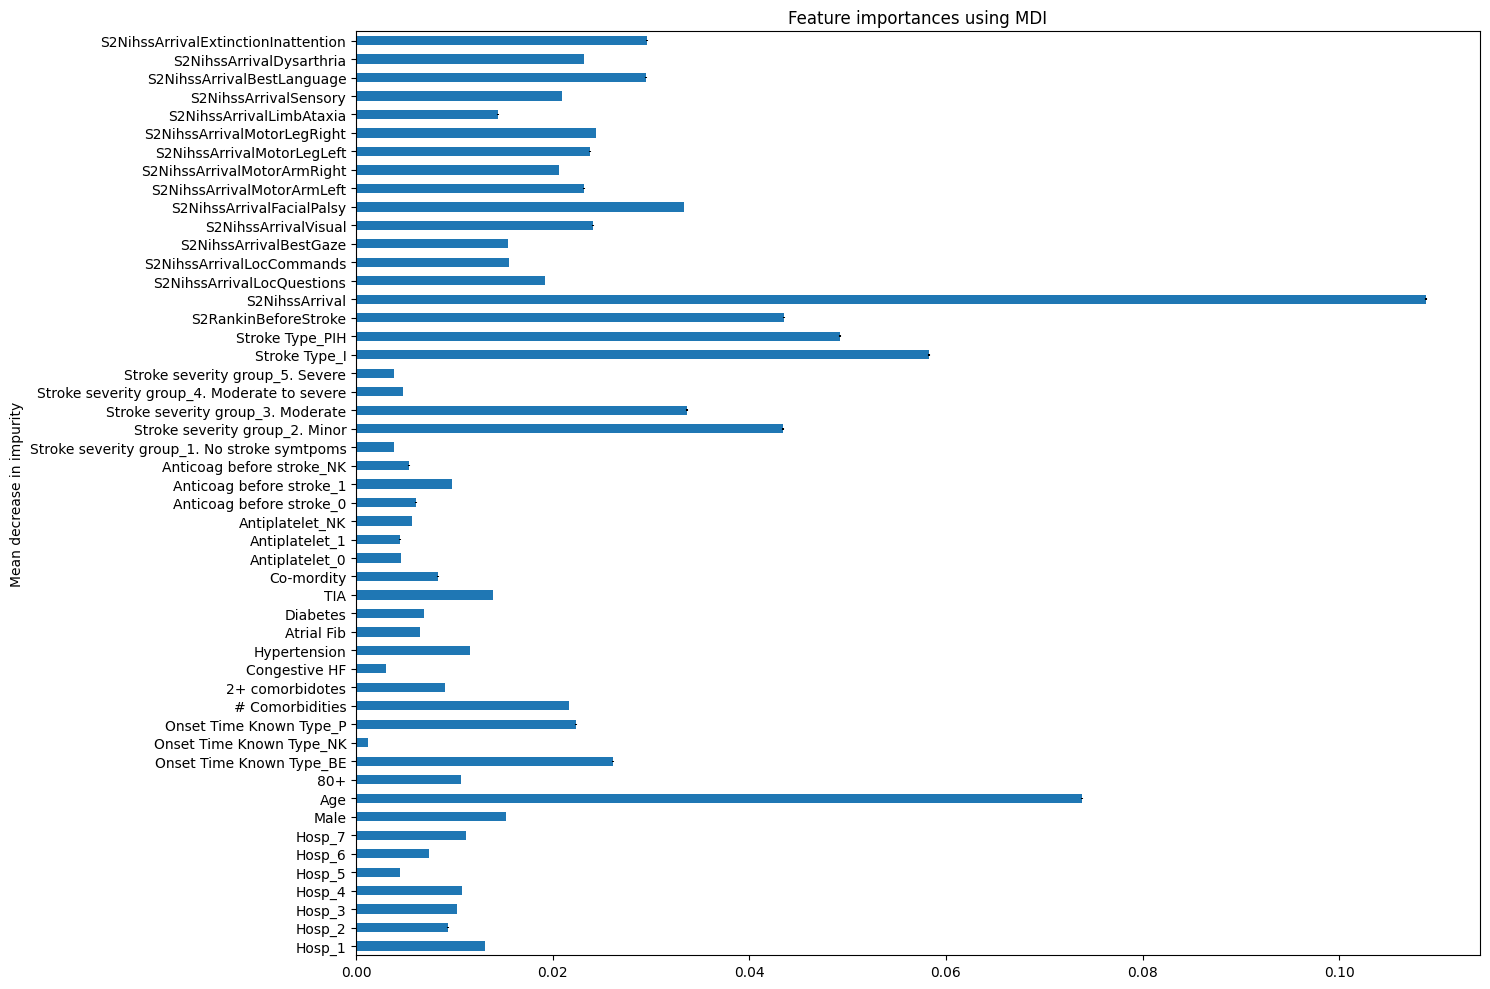

In [39]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

feature_names = X.columns.tolist()

importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

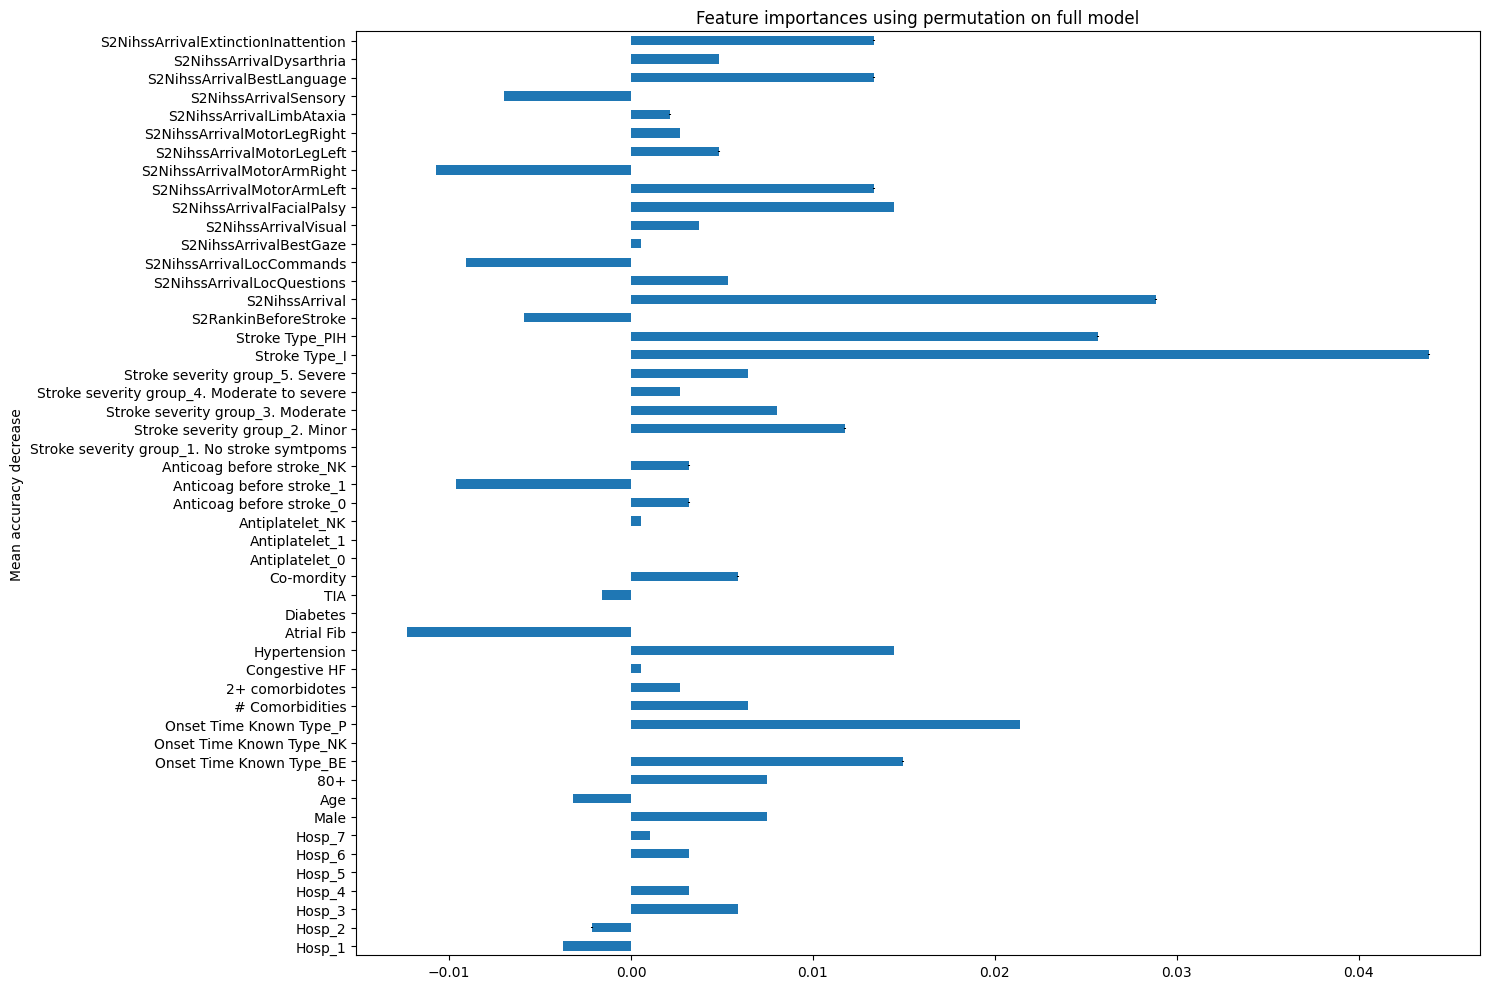

In [40]:
# Permutation feature importance
from sklearn.inspection import permutation_importance
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

feature_names = X.columns.tolist()

result = permutation_importance(
    model_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.barh(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Challenge Exercise 3
Can you improve accuracy of your random forest by changing the size of your train / test split?  



NOTE: This just shows trying out some different train/test splits!

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fit_model(model = RandomForestClassifier(random_state=42))

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 81.932%
Precision score for testing data = 81.932%
Recall (sensitivity) score for testing data = 81.932%
Specificity score for testing data = 84.503%


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

fit_model(model = RandomForestClassifier(random_state=42))

Accuracy of predicting training data = 100.000%
Accuracy of predicting testing data = 82.353%
Precision score for testing data = 82.353%
Recall (sensitivity) score for testing data = 82.353%
Specificity score for testing data = 85.000%


### Challenge Exercise 4

Try dropping some features from your data.  

Can you improve the performance of your random forest this way?

NOTE: This just shows how to choose a subset of features - not the best subset! We cover that in a later session.

In [36]:
# This isn't necessarily the best subset of features to use - it's just an example!
X_reduced = X[['S2NihssArrival', 'Stroke Type_PIH', 'Age', 'S2RankinBeforeStroke']]

X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42)

model = RandomForestClassifier(max_depth=5, random_state=42)
model = model.fit(X_reduced_train, y_train)
y_pred_train = model.predict(X_reduced_train)
y_pred_test = model.predict(X_reduced_test)

accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
precision_score_test = precision_score(y_test, y_pred_test, average='micro')
recall_sensitivity_score_test = recall_score(y_test, y_pred_test, average='micro')
specificity_score_test = precision_score(y_test, y_pred_test, pos_label=0)

# Note that the lecture slides show this displayed as a float using :3f
# We can instead use :.3% to format the number as a percentage to 3 decimal places.
print(f"Accuracy of predicting training data = {accuracy_train:.3%}")
print(f"Accuracy of predicting testing data = {accuracy_test:.3%}")
print(f"Precision score for testing data = {precision_score_test:.3%}")
print(f"Recall (sensitivity) score for testing data = {recall_sensitivity_score_test:.3%}")
print(f"Specificity score for testing data = {specificity_score_test:.3%}")

Accuracy of predicting training data = 80.537%
Accuracy of predicting testing data = 79.144%
Precision score for testing data = 79.144%
Recall (sensitivity) score for testing data = 79.144%
Specificity score for testing data = 88.235%
